Type 1 and Type 2 Errors

Testing an Unfair Coin

In [4]:
#loading requred packages
import numpy as np 
import scipy

Here you'll simulate an unfair coin with 75% chance of heads and 25% chance of tails. You'll then flip this coin 20 times and perform a test to determine whether you believe it to be fair or unfair.

In [5]:
n = 20 #number of flips
p = 0.75 #simulating an anfair coin
coin1 = np.random.binomial(n,p)
coin1

16

So you would expect that for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [7]:
sigma = np.sqrt(n*0.05*(1-0.05))
sigma

0.9746794344808963

Using z test to calculate the p-value

In [8]:
z = (coin1 -10) /(sigma / 1)
z

6.155870112510925

Finally, you can take your 
z
-score and apply standard lookup tables based on your knowledge of the normal distribution to determine the probability

In [9]:
import scipy.stats as st

In [10]:
st.norm.sf(np.abs(z))

3.733320061221337e-10

This is an absolutely tiny p-value, meaning that you can reject the null hypothesis this coin is fair and conclude that the coin is unfair!

Here is a demonstration of how the average p-values change as the size of the sample increases.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 0, 'Number of Coin Flips')

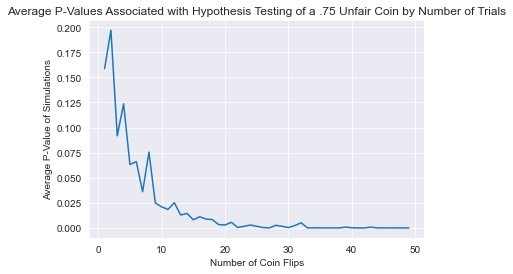

In [12]:
#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

Test 2



In [13]:
#loading requred packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random 

import seaborn as sns
sns.set(color_codes=True)

c:\Users\OKUKU\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


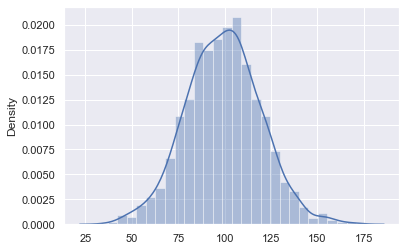

In [18]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop);

Now take two samples from this population and comment on the difference between their means and standard deviations. How would you ensure the independence between the elements of these samples?

In [20]:
k = 100
sample1 = np.random.choice(pop, 100, replace=True)

print("sample 1 summary")
stats.describe(sample1)

sample 1 summary


DescribeResult(nobs=100, minmax=(44.35042321901278, 140.28781935199044), mean=102.84824697911357, variance=347.0849292755183, skewness=-0.5327084548662769, kurtosis=0.14927942721862975)

In [21]:
sample2 = np.random.choice(pop, 100, replace=True)

print("sample 2 summary")
stats.describe(sample2)

sample 2 summary


DescribeResult(nobs=100, minmax=(54.317667238862946, 150.27698869369553), mean=101.5219095931792, variance=390.1161362433967, skewness=0.07420058639124931, kurtosis=-0.39004811604592415)

In [22]:
# test the sample means
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.48849602517983515, pvalue=0.6257391231228865)

c:\Users\OKUKU\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\OKUKU\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


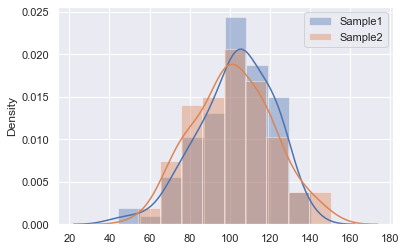

In [23]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1') 
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()


In [24]:
def type_1_error(population, num_tests, alpha_set):
    results = []
    
    for _ in range(num_tests):
        # Take two random samples from the same population
        sample1 = np.random.choice(population, size=30)
        sample2 = np.random.choice(population, size=30)
        
        # Perform an independent t-test
        t_stat, p_value = stats.ttest_ind(sample1, sample2)
        
        for alpha in alpha_set:
            # Determine if Type I error occurred (reject null when it's actually true)
            type_1_err = p_value < alpha
            results.append({'type_1_error': type_1_err, 'p_value': p_value, 'alpha': alpha})
    
    # Return the results as a DataFrame
    sig_tests = pd.DataFrame(results)
    return sig_tests

<AxesSubplot:title={'center':'TYPE I ERROR - FALSE POSITIVES'}, xlabel='alpha'>

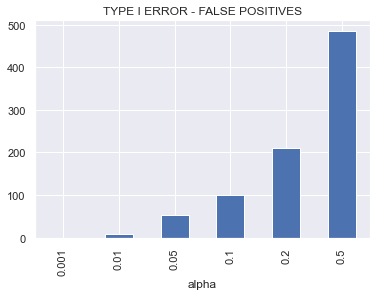

In [25]:
# Example usage:
population = np.random.normal(loc=100, scale=20, size=1000)  # mean=100, std=20
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

sig_tests_1 = type_1_error(population, num_tests, alpha_set)

# Group by alpha and plot the results
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()
group_error.plot.bar(title="TYPE I ERROR - FALSE POSITIVES")

## Type II error

This error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

In [26]:
def type_2_error(population, population_2, num_tests, alpha_set):
    results = []
    
    for _ in range(num_tests):
        # Take two random samples from different populations
        sample1 = np.random.choice(population, size=30)
        sample2 = np.random.choice(population_2, size=30)
        
        # Perform an independent t-test
        t_stat, p_value = stats.ttest_ind(sample1, sample2)
        
        for alpha in alpha_set:
            # Determine if Type II error occurred (fail to reject null when it's false)
            type_2_err = p_value >= alpha
            results.append({'type_2_error': type_2_err, 'p_value': p_value, 'alpha': alpha})
    
    # Return the results as a DataFrame
    sig_tests = pd.DataFrame(results)
    return sig_tests


<AxesSubplot:title={'center':'TYPE II ERROR - FALSE NEGATIVES'}, xlabel='alpha'>

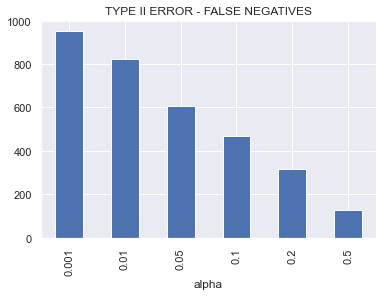

In [27]:
# Example usage:
population = np.random.normal(loc=100, scale=20, size=1000)  # mean=100, std=20
population_2 = np.random.normal(loc=110, scale=20, size=1000)  # mean=110, std=20
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

sig_tests_2 = type_2_error(population, population_2, num_tests, alpha_set)

# Group by alpha and plot the results
group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()
group_error2.plot.bar(title="TYPE II ERROR - FALSE NEGATIVES")

## Why is an α level of 0.05 chosen as a cut-off for statistical significance?

The 
α
 level of 0.05 is considered s good balance to avoid excessive type I or type II errors.

## If you decide to use a large value for alpha :

Increases the chance of rejecting the null hypothesis

The risk of a type II error (false negative) is REDUCED

Risk of a type I error (false positive) is INCREASED

## Similarly, if you decide to use a very small value of alpha, it'll change the outcome as:

Increases the chance of accepting the null hypothesis

The risk of a Type I error (false positive) is REDUCED

Risk of a Type II error (false negative) is INCREASED

From above, you can see that in statistical hypothesis testing, the more you try and avoid a type I error (false positive), the more likely a type II error (false negative) will occur.